# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [97]:
#import the necessary libraries
import pandas as pd
import seaborn as sns

In [98]:
# to supress warnings
import warnings
warnings.filterwarnings("ignore")

In [99]:
# pandas display - set the maximum number of columns
pd.set_option("display.max_columns", None)
# set the maximum number of rows
pd.set_option("display.max_rows", 200)

In [100]:
#import the data
df = pd.read_csv("ExtraaLearn.csv")

## Data Overview

- Observations
- Sanity checks

In [101]:
#we don't want to overwrite the original data frame
same_data = df.copy()
same_data

#from what it shows, we have 4612  rows and 15  columns

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0


We have 4612  rows and 15  columns

In [102]:
# we can also use data.shape to see the number pf rows and columns
#the first number shows rows, and the second one columns (4612 rows and 15 columns)
df.shape

(4612, 15)

Our data set has  4612 rows and 15 columns

In [103]:
# obesrving our data set 
df.head()
# by default it will display the first 5 and the last 5 rows

#let's inspect the data that we have



,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


MY OBSERVATION ABOUT THE DATA SET:

We have age of the lead and their current occupation 
#are they employed, unemployed or students

We have whether the lead interacted with ExtraLearn either through the web or mobile app -
this an help us see which one has more leads, the website or the mobile app

Profile completed shows if the lead completed their profile or not.
This could help us see whether completed profiles are the ones that buy or not
this is in percentages

We are also able to see how many times the lead visited the website

We also have information on the total time that a lead spent on the website
this is recorded in secs

When they visited our website, what was the average number of pages on the website did they view

We also have information that shows the last interaction between the lead and extra learn,
Was it through an email that they received about the program?
Did they have a phone conversation with a representative through sms?
Was it through the website? - Did they have a live chat on the website

Did the lead see the ad of ExtraaLearn in the newspaper?

Did the lead see the ad of ExtraaLearn in the magazine?

Did the lead see the ad of ExtraaLearn on a digital platform?

Did the lead hear about ExtraaLearn on an education channel
was it an online forum, or education wesite etc?

Did the lead hear about ExtraaLearn through a referral?

Did the lead eventually become a paying customer or not
***We want to see how many are paying customers out of the total

In [104]:
# let's find out how many unique values exist using the ID
df['ID'].nunique()
df.sample(10)
#it seems all our IDs start with EXT

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
1351,EXT1352,58,Professional,Mobile App,High,6,376,3.565,Email Activity,No,No,No,No,No,0
3417,EXT3418,56,Professional,Website,High,2,1667,2.251,Email Activity,No,No,No,No,No,1
1773,EXT1774,19,Student,Website,High,1,335,3.538,Email Activity,No,No,No,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
1375,EXT1376,58,Professional,Website,High,0,0,0.000,Phone Activity,No,No,No,No,No,1
4105,EXT4106,22,Student,Mobile App,Medium,8,35,2.225,Email Activity,No,No,Yes,No,No,0
2161,EXT2162,20,Student,Website,High,4,525,5.371,Website Activity,No,No,Yes,No,No,0
844,EXT845,60,Unemployed,Mobile App,High,9,61,5.382,Phone Activity,No,No,No,No,No,0
4603,EXT4604,26,Professional,Website,Medium,4,150,2.149,Website Activity,No,No,No,No,No,0
2137,EXT2138,55,Professional,Mobile App,High,2,1930,3.677,Email Activity,No,No,No,No,No,1


We have 4612 unique IDs, which match with the  4612 rows that we have (the shape of the dataset). 

This shows that every ID in the data field is unique

df.sample(10) shows that our IDs all start with EXT followed by numbers. The number seem to be incremental

In [105]:
#Anoher way of checking if there are any duplicates is to use the below code:
df.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
4607    False
4608    False
4609    False
4610    False
4611    False
Length: 4612, dtype: bool

Our dataset shows  no duplicates as it shows False

In [106]:
# checking for missing values and the data types that we have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

All of the values are not null values

We have 4612 rows, which shows that there are no missing values

Our data type shows that we have: 

1 float ( page_views_per_visit)

4 int types (age, website_visits, time_spent_on_website,status                 )

and 10 string types - mostly strings are treated as object variables

The total size of the data set is 540 kb which is rather a small data set


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

In [107]:
#let's look at the descriptive statistics for out continuous data set
# pandas treats integers and floats as continuous variables- hence it will shows us 5 values which are integers and floats
df.describe().T
#this will show us the minumum,maximum,quartile,median,std

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


# UNIVARIATE ANALYSIS - NUMERICAL FEATURES

1- AGE

On average our leads are aged 46. The minimum age is 18 and the highest age is 63

2- WEBSITE VISITS : how many times a customer(lead) visIted the website:

on average the customer visited the website about 4 times.

The lowest time is 0 and the maximum time a lead has visitd the website is 30 times


3- TIME SPENT ON WEBSITE: 

The average total time spend on the website by a customer is 724 seconds which is 12 mins


The lowest time spent on the website is 0 and the highest total time spent is 2537


4- PAGE VIEW PER VISIT - Average number of pages on the website viewed during the visits

On average a customer views 3 pages during a visit.

The least viewed number of pages is 0 meaning that the lead sometimes opens the site but does not view any page

The most viewed number of pages is 18

5- STATUS -  Flag indicating whether the lead was converted to a paid customer or not

On average, a lead converting to a customer has been very low, 0 and the maximum has been 1 client

this means leads that convert to buying customers are very few

In [108]:
# i want to know the value count of status
df['status'].value_counts()


status
0    3235
1    1377
Name: count, dtype: int64

The value count of status:

1377 leads have become  buying customers

3235 leads did not buy

This shows that fewer people end up becoming paying customes, compared to those that do not buy

We might need to find out which buying customers buy. maybe check employment status, time spent on website or  

CATEGORICAL FEATURES

There are:
 first_interaction      4612 non-null   object 

 profile_completed      4612 non-null   object 

 last_activity          4612 non-null   object 

print_media_type1      4612 non-null   object 

 print_media_type2      4612 non-null   object 

 digital_media          4612 non-null   object 

educational_channels   4612 non-null   object 

 referral               4612 non-null   object 

In [109]:

df['first_interaction'].value_counts()

first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64

This will help us determine whether the first interactions are mostly by website or Mobile apps


In [110]:
df['profile_completed'].value_counts()

profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64

Profile completed has high, medium and low

In [111]:
df['last_activity'].value_counts()

last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dtype: int64

Last Activity we have 3, either by email, phone or website and it seems most of the last activity is done through email

In [112]:
#Let's check if there is any data frame that is null
df.isnull().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

For each of the columns, we do not have any null value

In [113]:
#create a list of categorial columns in our dataset. Went to see by each column
cat_col = [ 'current_occupation', 'first_interaction','profile_completed', 'website_visits','time_spent_on_website','page_views_per_visit','last_activity', 'status']
 # how many unqie values to we have and whats the unique count/frequency
for column in cat_col:
 print(df[column].value_counts(1))
 print('-'*50)

current_occupation
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: proportion, dtype: float64
--------------------------------------------------
first_interaction
Website       0.551171
Mobile App    0.448829
Name: proportion, dtype: float64
--------------------------------------------------
profile_completed
High      0.490893
Medium    0.485906
Low       0.023200
Name: proportion, dtype: float64
--------------------------------------------------
website_visits
2     0.266479
1     0.163703
3     0.138985
4     0.107112
5     0.091500
6     0.061145
7     0.050304
0     0.037728
8     0.032741
9     0.016912
10    0.007372
11    0.006288
12    0.005421
13    0.004987
14    0.003686
15    0.001951
24    0.000650
16    0.000650
25    0.000434
20    0.000434
30    0.000217
18    0.000217
27    0.000217
21    0.000217
17    0.000217
19    0.000217
29    0.000217
Name: proportion, dtype: float64
--------------------------------------------------
time_spent_

In [114]:
# we want to plot using matplotlib
import matplotlib.pyplot as plt

In [115]:
# boxplots
# create a function called histogram_boxplot that takes our data frame
def histogram_boxplot(data,feature,figsize=(12,7),kde=True,bins = None):
    #create the plot so that they are uniform using matpltlib
    figure, (ax_box,ax_hist) = plt.subplots(2,sharex=True, figsize = figsize)
    sns.boxplot(data = data, x = feature, ax = ax_box, showmeans = True, color= 'violet')
    # we have created a box plot 
    # now lets create a histogram
    if bins == None:
      sns.histplot(data = data, x = feature,kde = kde,ax = ax_hist)
    else:
        sns.histplot(data = data, x = feature,kde = kde,ax = ax_hist, bins = bins)
        # it would be nice to see the mean and median too on the histogram
        ax_hist.axvline(data[feature].mean(),color = 'green',linestyle = '--')
        ax_hist.axvline(data[feature].median(),color ='black',linestyle ='--')

In [116]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


# Distribution for Age

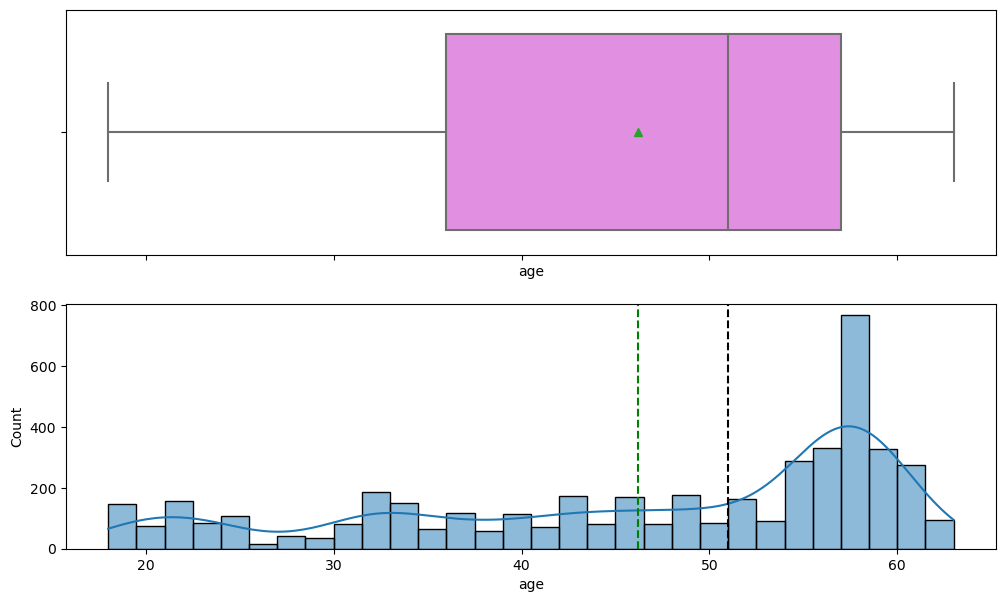

In [117]:
histogram_boxplot(df, "age", bins = 30)

* The mean value is less than the median 
* The median is less than the mode
* This makes the distribution left skewed
* The color green is the mean, which is around 47.
* The small green triangle on the box plot is the mean too
* This shows that our average age is 47
* The black --- is the median. Our median is around 51 years
* There's a single x axis because we said: sharex=True meaning they should share the x axis
* The distribution seems normally distributed 
* Our median is at the far right - seems most of the ages are less then 51
* There are no outliers




# Distribution for website visits

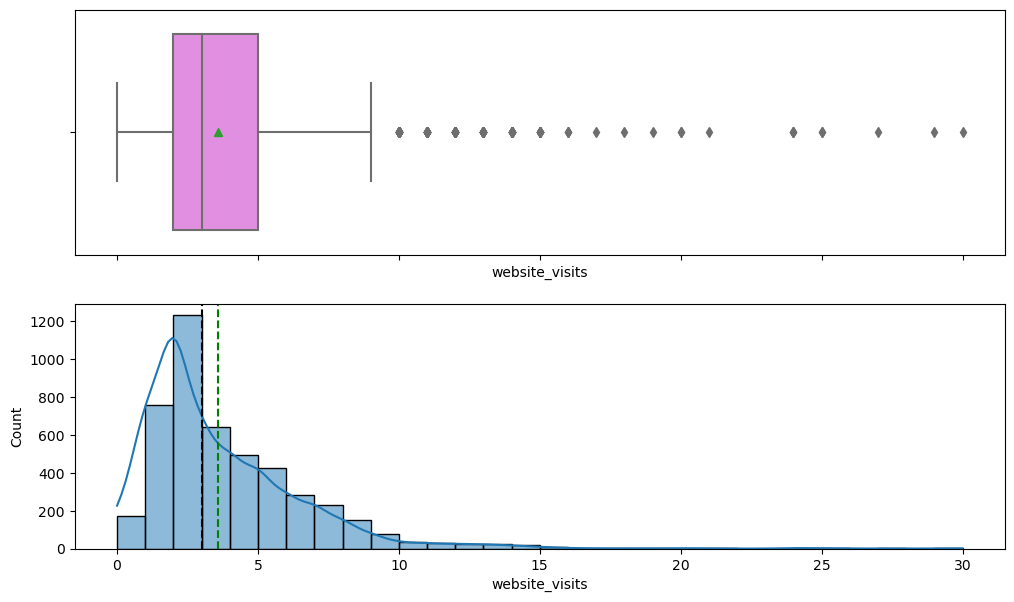

In [118]:
histogram_boxplot(df, "website_visits", bins = 30)

* The color green is the mean - The small green triangle on the box plot is the mean too
* The black --- is the median. *
* when the mean is more than the median which is more than the mode (the most frequent)..This become right skewed 
* The average number of times a lead has visited the website is 4 times, whilst the median is 3 times
* The median and mean values are close to each other
* Very few people visit it more that 10 times. After 10 times those are now outliers
* The maximum is 
* The minimum is 0 times whilst the most to visit is 30 times, which is a very huge difference



# Distribution for time spent on website

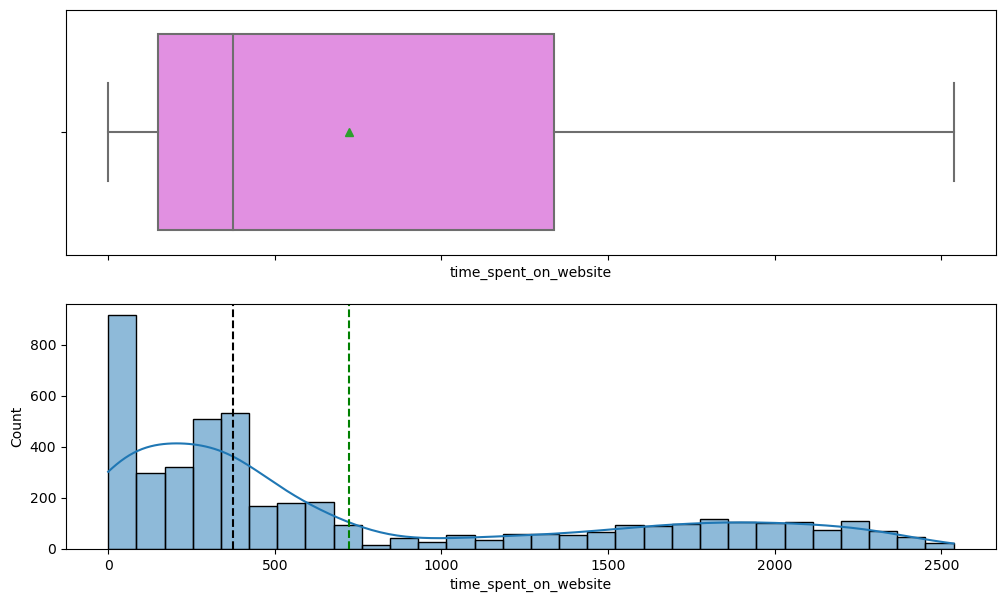

In [119]:
histogram_boxplot(df, "time_spent_on_website", bins = 30)

* The color green is the mean - The small green triangle on the box plot is the mean too
* The black --- is the median. 
* The mean is greater than the median
* The median is greater than the mode
* The disbrution is skewed to the right
* Hence this distribution  is right 
* The average time spent on the website is around 724 secs which is about 12 minutes
* The most frequent number of seconds about 900 seconds (15 mins )
* The biggest time spent on the website is 2500 secs (41 mins)




# Distribution for page views per visit

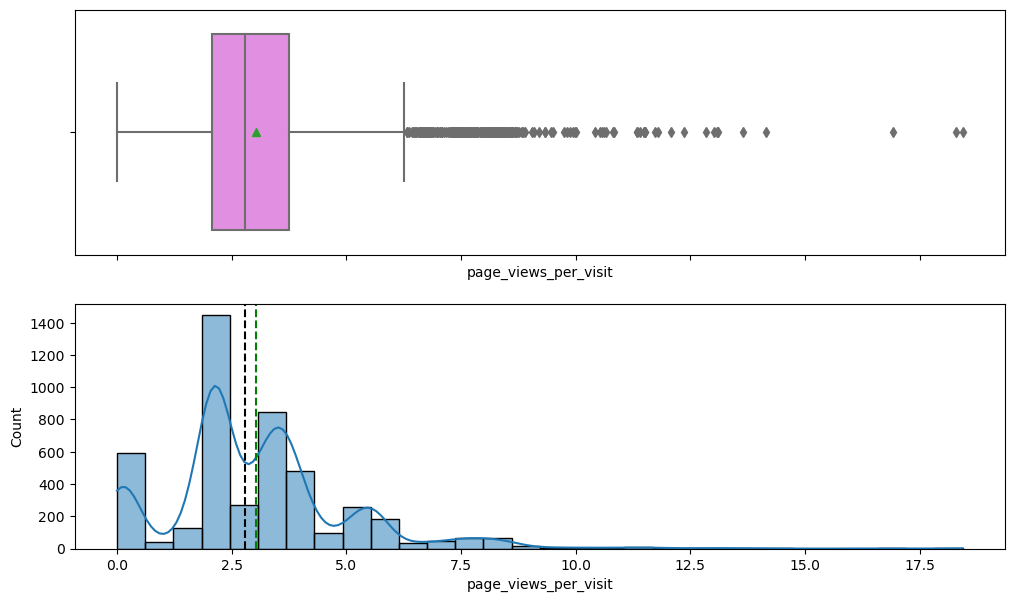

In [120]:
histogram_boxplot(df, "page_views_per_visit", bins = 30)

* The color green is the mean, which is around 47.
* mode is the peak of the distribution
* The small green triangle on the box plot is the mean too
* This shows that our average age is 47
* The black --- is the median. Our median is around 51 years
* The mean is slightly greater than the median
* The median is greater than the mode
* when the mean is more than the median which is more than the mode (the most frequent)..This become right skewed 
* The mean and mode are close to each other
* The average page views per visit is around 3 pages
* Most maximum number of pages visited is 18
* We have outliers which start from 6 page views per visit, which means there are very few people that exceed 6 pages per visit

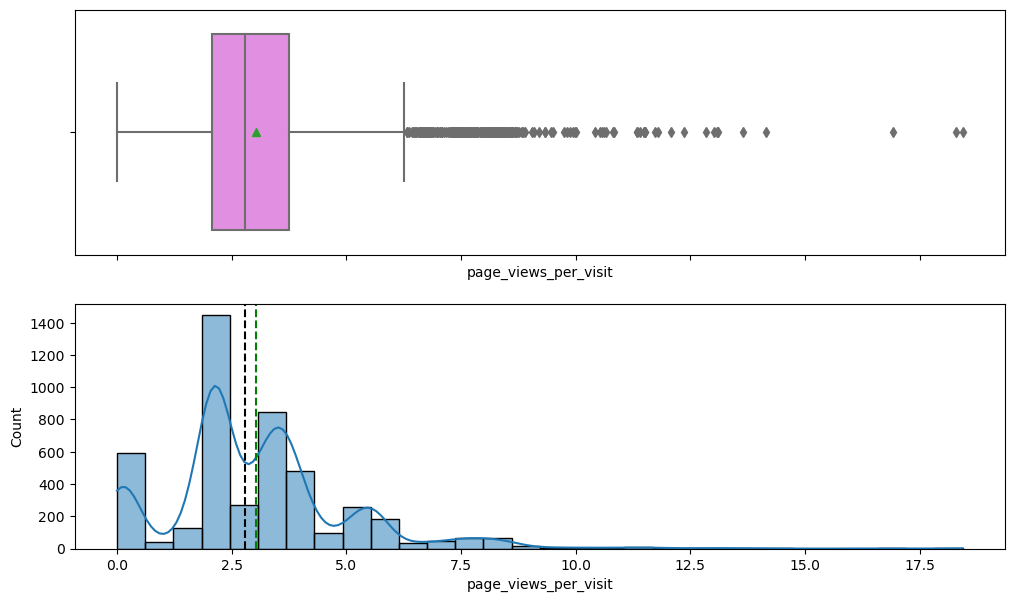

In [164]:
histogram_boxplot(df, "page_views_per_visit", bins = 30)

# Bivariate Analysis

Correlation Tables

In [125]:
# let's look at the dataframe again
df.head(2)

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0


In [143]:

df = df.select_dtypes(exclude=[object])

In [144]:
df.corr() 
#data.corr() will automatically identify numeric variables

,age,website_visits,time_spent_on_website,page_views_per_visit,status
age,1.000000,-0.011975,0.018885,-0.040675,0.122084
website_visits,-0.011975,1.000000,0.062300,0.074094,-0.006609
time_spent_on_website,0.018885,0.062300,1.000000,0.068130,0.302100
page_views_per_visit,-0.040675,0.074094,0.068130,1.000000,0.000307
status,0.122084,-0.006609,0.302100,0.000307,1.000000


<Axes: >

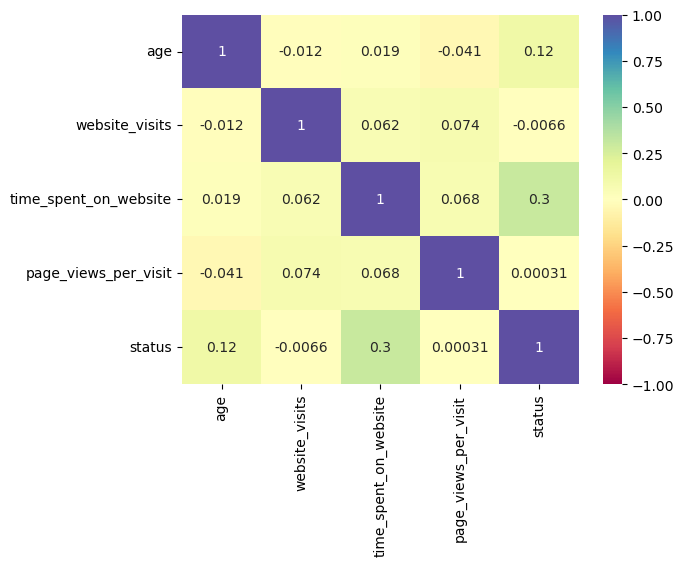

In [147]:
# we want extreme values to have different colors, so we will use a heatmap. This will give us some colors and present it as a figure
sns.heatmap(df.corr(),annot = True,cmap = 'Spectral',vmin=-1,vmax=1)

* 1 is extreme correlation
* If you realise, every variable with itself has a perfect correlation
* Correlations start with -1 all the way to 1
* The highest corelation that we have is 0.3 followed by 0.12
* There is a 0.3 correlation between the status of a lead and time spent on website which is slightly below 0.5
* It seems that the more time you spend on the website, the likely it is that the lead will buy
* There is a 0.12 correlation between age and status

# Categorical Variables

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

In [153]:
df = pd.read_csv("ExtraaLearn.csv")

<Axes: xlabel='status', ylabel='current_occupation'>

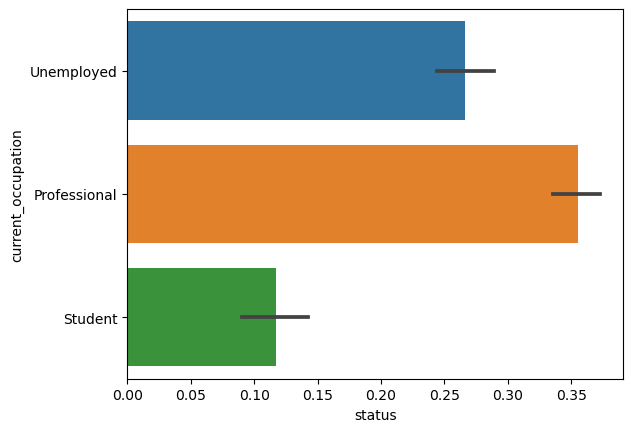

In [154]:
# let's look at some of the categorial variables
# How does current occupation affect lead status
sns.barplot(x = "status", y = "current_occupation", data = df)
# Professionals seem to eventually convert to a paying lead, whilst student don't buy much, probably because they cannot afford
# the unemployed also turn to buying customers probably because they have nothing to do hence they have all th etime to learn

* Students have the lowest in terms of buying, only about 11% of students convert to paying customers
* The most paying customers are the professionals, most probably because they can afford, compaed to students
* About 26% of the unemployed convert to paying customers most probably because they have the time to study and learn

In [162]:
def stacked_barplot(data,predictor,target):
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor],data[target]).sort_values(by=sorter,ascending=False)
    print(tab1)

In [163]:
stacked_barplot(df,'current_occupation','first_interaction')

first_interaction   Mobile App  Website
current_occupation                     
Professional              1191     1425
Unemployed                 642      799
Student                    237      318


<Axes: xlabel='status', ylabel='first_interaction'>

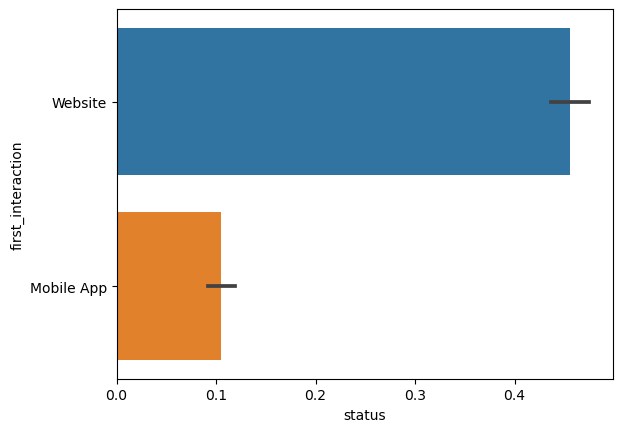

In [123]:
# Do the first channels of interaction have an impact on the lead status?
sns.barplot(x = "status", y = "first_interaction", data=df)
# Those whose fist interaction is the website are most likely to buy than those using mobile app
# On average the person who is likel to buy first interacted with the website
# There is a significance difference that shows between the two


In [124]:
#data.corr()

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

## EDA

- It is a good idea to explore the data once again after manipulating it.

## Building a Decision Tree model

## Do we need to prune the tree?

## Building a Random Forest model

## Do we need to prune the tree?

## Actionable Insights and Recommendations